Correlation Matrix is as follows:
 CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64
The attribute with highest correlation and PRICE is: PRICE
Analytic Solution:
Beta 0 (Intercept): 22.112541254125414
Beta 1 (Slope): 2.743679870756823e-15
SSE: 3766919.597054973
R^2: -204.4666217372155


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-5-4e44343f0db4>:69: RuntimeWarning: invalid value encountered in scalar subtract
  beta_0_gd -= alpha * (1/len(n_train)) * np.sum(error)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Gradient Descent is:
Beta 0(Intercept) is: nan
Beta 1(Slope) is: nan
Sum Squared Error is: nan
R^2 is: nan


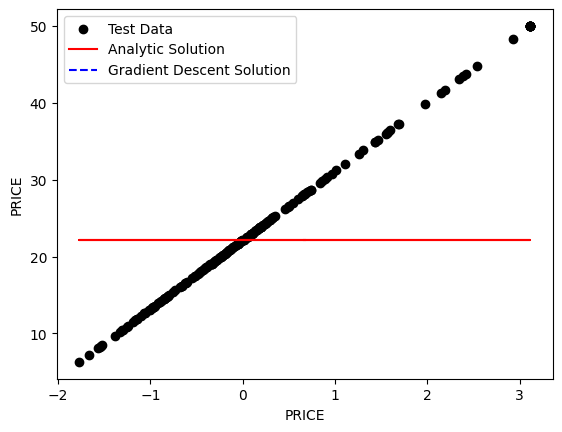

In [ ]:
import numpy as np
import pandas as pd
#from sklearn.datasets import load_boston
# This function has been removed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# To Load Boston Housing dataset from the original source
data_url ="http://lib.stat.cmu.edu/datasets/boston"
raw_df =pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)
data =np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target =raw_df.values[1::2, 2]

df =pd.DataFrame(data=data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
df['PRICE'] =target

# To Analyze the dataset nd find the attribute with best linear relationship value
corr_matrix =df.corr()
print("Correlation Matrix is as follows:\n", corr_matrix['PRICE'])

# To Select the attribute with highest correlation with PRICE
best_attribute = corr_matrix['PRICE'].idxmax(axis=0)
print(f"The attribute with highest correlation and PRICE is: {best_attribute}")

# To Split the data into training and testing sets
M =df[[best_attribute]].values
n =df['PRICE'].values
M_train,M_test, n_train, n_test = train_test_split(M,n,test_size=0.4,random_state=1)

# To Normalize the features
scaler = StandardScaler()
M_train_scaled = scaler.fit_transform(M_train)
M_test_scaled = scaler.transform(M_test)

# The Analytic Solution for Linear Regression
M_train_mean = np.mean(M_train_scaled)
n_train_mean = np.mean(n_train)

numerator = np.sum((M_train_scaled -M_train_mean) * (n_train - n_train_mean))
denominator = np.sum((M_train_scaled -M_train_mean) ** 2)
beta_1_analytic = numerator / denominator
beta_0_analytic = n_train_mean -beta_1_analytic *M_train_mean

n_pred_analytic = beta_0_analytic + beta_1_analytic *M_test_scaled


SSE_analytic =np.sum((n_test -n_pred_analytic) ** 2)
SST =np.sum((n_test - np.mean(n_test)) ** 2)
R2_analytic = 1 - SSE_analytic / SST

print("Analytic Solution:")
print(f"Beta 0 (Intercept): {beta_0_analytic}")
print(f"Beta 1 (Slope): {beta_1_analytic}")
print(f"SSE: {SSE_analytic}")
print(f"R^2: {R2_analytic}")

# Gradient Descent Implementation

# Initialize coefficients to zero
beta_0_gd = 0
beta_1_gd = 0
alpha = 0.01  # Learning rate
epochs = 1000  # No.of iterations

for epoch in range(epochs):
    n_pred_gd = beta_0_gd + beta_1_gd * M_train_scaled
    error = n_pred_gd -n_train
    beta_0_gd -= alpha * (1/len(n_train)) * np.sum(error)
    beta_1_gd -= alpha * (1/len(n_train)) * np.sum(error * M_train_scaled)

n_pred_gd_test = beta_0_gd + beta_1_gd *M_test_scaled

# Calculate SSE and R^2 for Gradient Descent
SSE_gd = np.sum((n_test -n_pred_gd_test) ** 2)
R2_gd = 1 - SSE_gd / SST

print("\nGradient Descent is:")
print(f"Beta 0(Intercept) is: {beta_0_gd}")
print(f"Beta 1(Slope) is: {beta_1_gd}")
print(f"Sum Squared Error is: {SSE_gd}")
print(f"R^2 is: {R2_gd}")

# Plotting the results for the graph
plt.scatter(M_test_scaled,n_test,color='black',label='Test Data')
plt.plot(M_test_scaled,n_pred_analytic,color='red',label='Analytic Solution')
plt.plot(M_test_scaled,n_pred_gd_test,color='blue',linestyle='--',label='Gradient Descent Solution')
plt.xlabel(best_attribute)
plt.ylabel('PRICE')
plt.legend()
plt.show()
